In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('C:\\Users\\Chakravarthy\\Downloads\\Compressed\\archive_2\\Virat_Kohli.csv')

C:\Users\Chakravarthy\AppData\Local\Temp\ipykernel_14812\409880902.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:\\Users\\Chakravarthy\\Downloads\\Compressed\\archive_2\\Virat_Kohli.csv')


In [3]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1548210906655379456,1548210906655379456,2022-07-16 07:40:19 UTC,2022-07-16,07:40:19,0,1335807310560546818,klmanjit1,Manjit Nath,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1548210897662795778,1548210897662795778,2022-07-16 07:40:17 UTC,2022-07-16,07:40:17,0,1520621559458660352,sayad__ansari,Sayad Ansari,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1548210802351517697,1548206381173334018,2022-07-16 07:39:54 UTC,2022-07-16,07:39:54,0,1036147676000075778,_klausxx,✖️,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Kohli_Spy', 'name': 'S P Y',...",NaN,NaN,NaN,NaN
3,1548210792008339456,1548210792008339456,2022-07-16 07:39:51 UTC,2022-07-16,07:39:51,0,1521809171821174784,officialskyfair,SkyFair,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1548210783196041224,1548210783196041224,2022-07-16 07:39:49 UTC,2022-07-16,07:39:49,0,1456176133255348231,hoshyarpakistan,hoshyarpakistan,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20001 non-null  int64  
 1   conversation_id  20001 non-null  int64  
 2   created_at       20001 non-null  object 
 3   date             20001 non-null  object 
 4   time             20001 non-null  object 
 5   timezone         20001 non-null  int64  
 6   user_id          20001 non-null  int64  
 7   username         20001 non-null  object 
 8   name             20001 non-null  object 
 9   place            2 non-null      object 
 10  tweet            20001 non-null  object 
 11  language         20001 non-null  object 
 12  mentions         20001 non-null  object 
 13  urls             20001 non-null  object 
 14  photos           20001 non-null  object 
 15  replies_count    20001 non-null  int64  
 16  retweets_count   20001 non-null  int64  
 17  likes_count 

In [5]:
df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              19999
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          18025
video                  0
thumbnail          17150
near               20001
geo                20001
source             20001
user_rt_id         20001
user_rt            20001
retweet_id         20001
reply_to               0
retweet_date       20001
translate          20001
trans_src          20001
trans_dest         20001
dtype: int64

In [6]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
df_text=df.drop(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],axis=1)

In [8]:
df_text=df_text.rename(columns={'tweet':'text'})

In [9]:
def data_cleaning(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    tokens = word_tokenize(text)
    result = [w for w in tokens if not w in stop_words]
    return " ".join(result)

In [10]:
df_text.text = df_text['text'].apply(data_cleaning)

In [11]:
df_text = df_text.drop_duplicates('text')

In [12]:
stemmer = PorterStemmer()
def func_stem(data):
    text = [stemmer.stem(x) for x in data]
    return data

In [13]:
df_text['text'] = df_text['text'].apply(lambda y: func_stem(y))

In [14]:
def polarity_val(text):
    return TextBlob(text).sentiment.polarity

In [15]:
df_text['Polarity_value'] = df_text['text'].apply(polarity_val)

In [16]:
df_text.head()

,text,Polarity_value
0,runs india since 2020 2265 virat kohli 72 inni...,0.000000
1,strong kohli,0.433333
2,kohli_spy bcci em ledhu,0.000000
3,monty panesar bcci cant afford drop virat kohl...,0.000000
4,babars message kohli irfan pathan say,0.000000


In [17]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18222 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            18222 non-null  object 
 1   Polarity_value  18222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 427.1+ KB


In [18]:
def analysis_sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [19]:
df_text['Sentiment_value'] = df_text['Polarity_value'].apply(analysis_sentiment)

Text(0.5, 1.0, 'Distribution of sentiments')

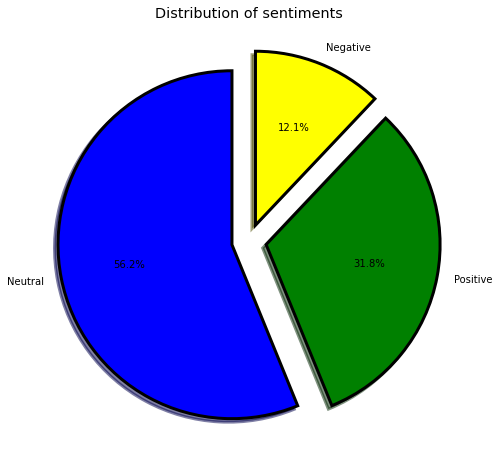

In [21]:
fig = plt.figure(figsize=(8,8))
color = ("blue", "green", "yellow")
w = {'linewidth':3, 'edgecolor':"black"}
tags = df_text['Sentiment_value'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = color,
         startangle=90, wedgeprops = w, explode = explode, label='')
plt.title('Distribution of sentiments')

<AxesSubplot:xlabel='Sentiment_value', ylabel='count'>

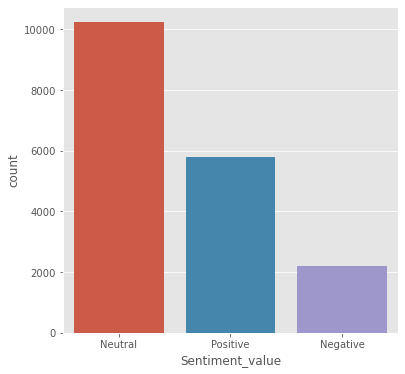

In [22]:
fig = plt.figure(figsize=(6,6))
sns.countplot(x='Sentiment_value', data = df_text)

In [25]:
tweets_neutral_val = df_text[df_text.Sentiment_value == 'Neutral']
tweets_neutral_val = tweets_neutral_val.sort_values(['Polarity_value'], ascending= False)
tweets_neutral_val.head()

,text,Polarity_value,Sentiment_value
0,runs india since 2020 2265 virat kohli 72 inni...,0.0,Neutral
13162,vikrantgupta73 babarazam258 king babar king kohli,0.0,Neutral
13146,pakistan captain babar azam showers support fo...,0.0,Neutral
13147,imvkohli sunday 71th century vidrathe mams,0.0,Neutral
13149,kohli need reassurance says rohit sharma defea...,0.0,Neutral


In [26]:
tweets_positive_val = df_text[df_text.Sentiment_value == 'Positive']
tweets_positive_val = tweets_positive_val.sort_values(['Polarity_value'], ascending= False)
tweets_positive_val.head()

,text,Polarity_value,Sentiment_value
8821,crickettwitter babar azam said virat kohli rem...,1.0,Positive
11900,babarazam258 form temporary class permanent ko...,1.0,Positive
18354,babarazam258 made realize virat kohli greatest...,1.0,Positive
18351,sportsmanship best imvkohli babarazam258,1.0,Positive
1134,mattyvincent44 best king kohli,1.0,Positive


In [27]:
tweets_negative_val = df_text[df_text.Sentiment_value == 'Negative']
tweets_negative_val = tweets_negative_val.sort_values(['Polarity_value'], ascending= False)
tweets_negative_val.head()

,text,Polarity_value,Sentiment_value
640,islamicjusticee dont see wrong kohli good natu...,-6.938894e-18,Negative
18375,criccrazykohli dont say anything spreading hat...,-1.387779e-17,Negative
19589,kohlity_matters want idol play even hes liabil...,-1.850372e-17,Negative
12877,babarazam258 nice see babar rallying behind he...,-1.850372e-17,Negative
683,rjriteshjha imvkohli know fan maybe little hur...,-3.571429e-04,Negative


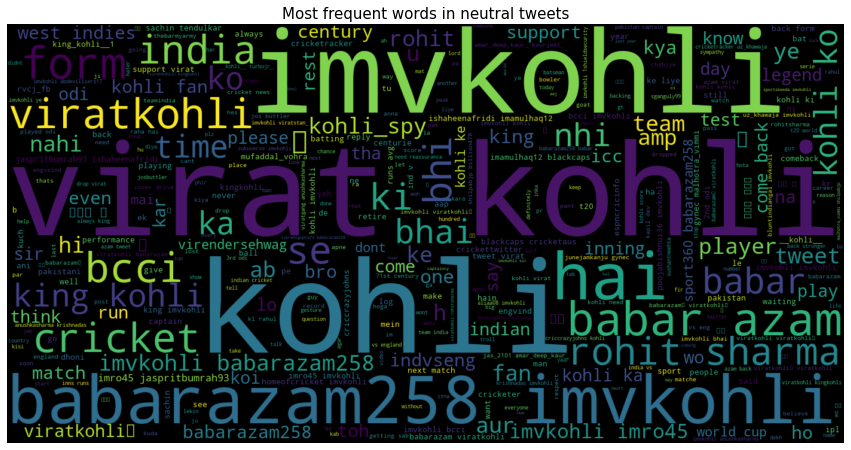

In [31]:
txt = ' '.join([w for w in tweets_neutral_val['text']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1400, height=700).generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=15)
plt.show()

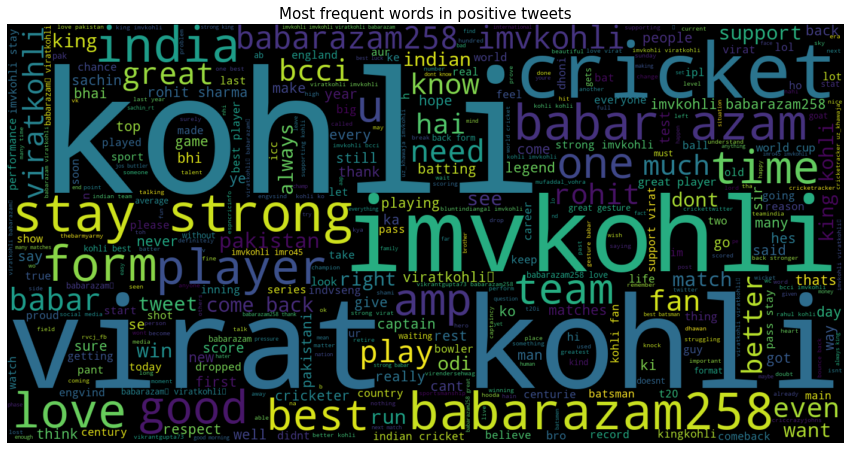

In [32]:
txt = ' '.join([w for w in tweets_positive_val['text']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1400, height=700).generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=15)
plt.show()

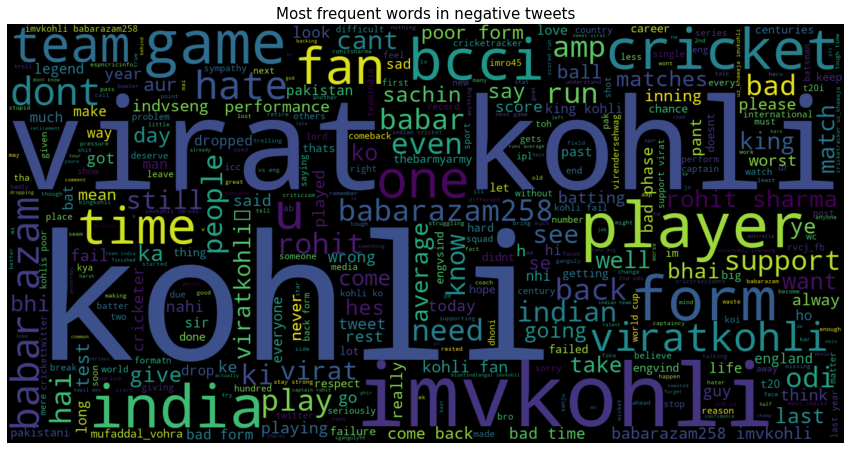

In [33]:
txt = ' '.join([w for w in tweets_negative_val['text']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1400, height=700).generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=15)
plt.show()

In [34]:
v = CountVectorizer(ngram_range=(1,2)).fit(df_text['text'])

In [36]:
features = v.get_feature_names()
print("First 20 features:\n {}".format(features[:20]))

First 20 features:
 ['00', '00 sharma', '000000', '000000 nhi', '0044', '0044 18', '0053', '0053 15', '0057', '0057 14', '0059', '0059 14', '0062', '0064', '0064 16', '0072', '0072 14', '007schrodinger', '007schrodinger bhaisalaar', '007schrodinger thor23619218']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
X = df_text['text']
X = v.transform(X)
Y = df_text['Sentiment_value']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [39]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
reg_pred = reg.predict(x_test)
reg_acc = accuracy_score(reg_pred, y_test)
print("Test accuracy: {:.2f}%".format(reg_acc*100))

Test accuracy: 86.85%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print(confusion_matrix(y_test, reg_pred))
print("\n")
print(classification_report(y_test, reg_pred))

[[ 379  230   94]
 [  11 2952   34]
 [  50  300 1417]]


              precision    recall  f1-score   support

    Negative       0.86      0.54      0.66       703
     Neutral       0.85      0.98      0.91      2997
    Positive       0.92      0.80      0.86      1767

    accuracy                           0.87      5467
   macro avg       0.88      0.78      0.81      5467
weighted avg       0.87      0.87      0.86      5467



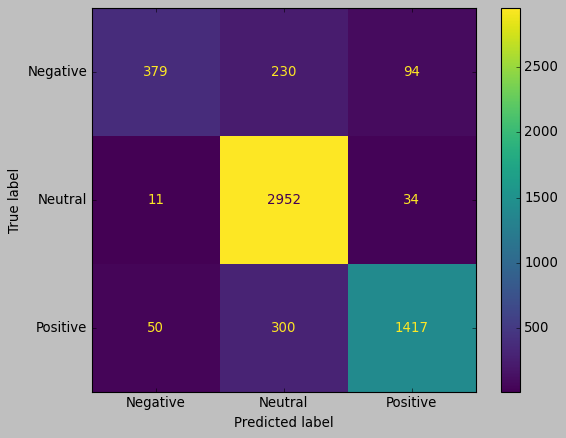

In [41]:
style.use('classic')
x = confusion_matrix(y_test, reg_pred, labels=reg.classes_)
out = ConfusionMatrixDisplay(confusion_matrix = x, display_labels=reg.classes_)
out.plot()

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), parameters_grid)
grid.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [44]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [45]:
y_pred = grid.predict(x_test)

In [46]:
reg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(reg_acc*100))

Test accuracy: 88.13%


In [47]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 402  210   91]
 [  10 2956   31]
 [  47  260 1460]]


              precision    recall  f1-score   support

    Negative       0.88      0.57      0.69       703
     Neutral       0.86      0.99      0.92      2997
    Positive       0.92      0.83      0.87      1767

    accuracy                           0.88      5467
   macro avg       0.89      0.79      0.83      5467
weighted avg       0.88      0.88      0.88      5467



In [48]:
from sklearn.svm import LinearSVC

In [49]:
model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [50]:
svc_pred = model.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 89.78%


In [51]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 445  178   80]
 [   9 2963   25]
 [  46  221 1500]]


              precision    recall  f1-score   support

    Negative       0.89      0.63      0.74       703
     Neutral       0.88      0.99      0.93      2997
    Positive       0.93      0.85      0.89      1767

    accuracy                           0.90      5467
   macro avg       0.90      0.82      0.85      5467
weighted avg       0.90      0.90      0.89      5467



In [53]:
grid_dict = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid_dict = GridSearchCV(model, parameters_grid)
grid_dict.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [54]:
print("Best parameter:", grid_dict.best_params_)

Best parameter: {'C': 10}


In [55]:
y_pred = grid_dict.predict(x_test)

In [56]:
reg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(reg_acc*100))

Test accuracy: 89.94%


In [57]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 449  174   80]
 [  10 2961   26]
 [  46  214 1507]]


              precision    recall  f1-score   support

    Negative       0.89      0.64      0.74       703
     Neutral       0.88      0.99      0.93      2997
    Positive       0.93      0.85      0.89      1767

    accuracy                           0.90      5467
   macro avg       0.90      0.83      0.86      5467
weighted avg       0.90      0.90      0.90      5467

